<a href="https://colab.research.google.com/github/LIvanoff/ropsppr/blob/main/pr1_ropsppr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анамнестические методы рекомендательных систем

Создать программную реализацию анамнестическогометодарекомендательной системы (РС), основанной либо насоседствепользователей, либо на соседстве элементов (предметов), включающую:
  - актуальную предметную область для применения РС(вродемаркетплейса, медиа ресурсов, соц. сетей, экономической сферыит.д.);
  - математические меры сходств: расстояние Жаккара, нормулебеговапространства (Lp-норму), коэффициент Отиаи, коэффициент корреляцииПирсона и т.п. (см. Примечание 1), необходимо реализовать неменее3-ёхлюбых методов (пояснить, почему были выбраны именно этиметоды);
  - сравнение вышеописанных методов и, исходя из результатов, выборнаиболее подходящего(-их) метода(-ов) для решения задачи

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {'Ivanov':[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
        'Kleyzer':[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
        'Aypova': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'Astanin': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Karpov': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'Zaytsev': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Maslov': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        'Sorokin': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        'Avalishvili': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
        'Boriskin': [1, 0, 0,	0,	0,	0,	0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        'Belyaev': [0,	0,	0, 0,	0,	0,	0,	1,	1,	0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
        'Everstov': [1, 1,	0,	0,	0, 1,	0,	0,	1,	0,	0, 1, 0, 0, 0, 1, 1, 1, 1],
        'Mochalov': [1,	0,	0,	0,	0, 0,	1,	0,	0,	0,	0,	0, 1, 0, 1, 0, 0, 0, 1],
        'Lekur': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 0, 1, 0, 0, 0, 0, 0],
        'Kulikov': [0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0, 1, 0, 0, 0, 0],
        'Garin': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
        'Petrosyan': [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
        'Gurov': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
        'Litwinov': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
        }

df = pd.DataFrame(data, index =['Ivanov', 'Kleyzer', 'Aypova', 'Astanin', 'Karpov', 'Zaytsev', 'Maslov', 'Sorokin',
                                'Avalishvili', 'Boriskin', 'Belyaev', 'Everstov', 'Mochalov', 'Lekur', 'Kulikov',
                                'Garin', 'Petrosyan', 'Gurov', 'Litwinov'])

group_labels = [0,0,1,2,1,2,1,3,3,2,3,0,4,2,1,0,0,5,4]
for i in range(len(group_labels)):
  if group_labels[i] == 0:
    group_labels[i] = 'ikbo-15'
  elif group_labels[i] == 1:
    group_labels[i] = 'ikbo-04'
  elif group_labels[i] == 2:
    group_labels[i] = 'ikbo-14'
  elif group_labels[i] == 3:
    group_labels[i] = 'ikbo-22'
  elif group_labels[i] == 4:
    group_labels[i] = 'ikbo-05'
  elif group_labels[i] == 5:
    group_labels[i] = 'ikbo-24'


In [ ]:
df

,Ivanov,Kleyzer,Aypova,Astanin,Karpov,Zaytsev,Maslov,Sorokin,Avalishvili,Boriskin,Belyaev,Everstov,Mochalov,Lekur,Kulikov,Garin,Petrosyan,Gurov,Litwinov
Ivanov,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1
Kleyzer,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0
Aypova,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
Astanin,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Karpov,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
Zaytsev,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
Maslov,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0
Sorokin,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Avalishvili,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
Boriskin,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


## Косинусная близость

In [ ]:
def cosine_sim(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.dot(a_emb, b_emb) / (np.sqrt(np.sum(a_emb)) * np.sqrt(np.sum(b_emb)))

In [ ]:
cosine_sim('Ivanov', 'Karpov', df)

0.15075567228888181

In [ ]:
def cosine_sim_emb(a_emb: np.array, b_emb: np.array, df: pd.core.frame.DataFrame):
  return np.dot(a_emb, b_emb) / (np.sqrt(np.sum(a_emb)) * np.sqrt(np.sum(b_emb)))

def most_sim(df: pd.core.frame.DataFrame, positive: list = [], negative: list = []):
  if len(positive) != 0:
    emb = df[positive[0]].to_numpy()
    for i in range(1, len(positive)):
      pos_emb = df[positive[i]].to_numpy()
      emb = np.logical_or(emb, pos_emb).astype(int)
    if len(negative) != 0:
      for column in negative:
        neg_emb = df[column].to_numpy()
        emb = np.logical_xor(emb, neg_emb).astype(int)
  else:
    emb = df[negative[0]].to_numpy()
    for i in range(1, len(negative)):
      neg_emb = df[negative[i]].to_numpy()
      emb = np.logical_xor(emb, neg_emb).astype(int)
  cos_list = {}
  for column in df.columns:
    if column in positive or column in negative:
      pass
    else:
      sec_emb = df[column].to_numpy()
      cos_list[column] = cosine_sim_emb(emb, sec_emb, df)

  cos_list = {k: cos_list[k] for k in sorted(cos_list, key=cos_list.get, reverse=True)}

  return cos_list

In [ ]:
most_sim(positive=['Ivanov', 'Petrosyan'], df=df.copy()) # , negative=['Petrosyan']

{'Everstov': 0.8040302522073697,
 'Kleyzer': 0.7385489458759965,
 'Gurov': 0.7385489458759965,
 'Litwinov': 0.674199862463242,
 'Avalishvili': 0.6154574548966638,
 'Mochalov': 0.5393598899705937,
 'Garin': 0.5393598899705937,
 'Boriskin': 0.5222329678670935,
 'Maslov': 0.3418817293789138,
 'Belyaev': 0.26967994498529685,
 'Kulikov': 0.2461829819586655,
 'Zaytsev': 0.17407765595569785,
 'Sorokin': 0.17407765595569785,
 'Aypova': 0.15075567228888181,
 'Karpov': 0.15075567228888181,
 'Astanin': 0.0,
 'Lekur': 0.0}

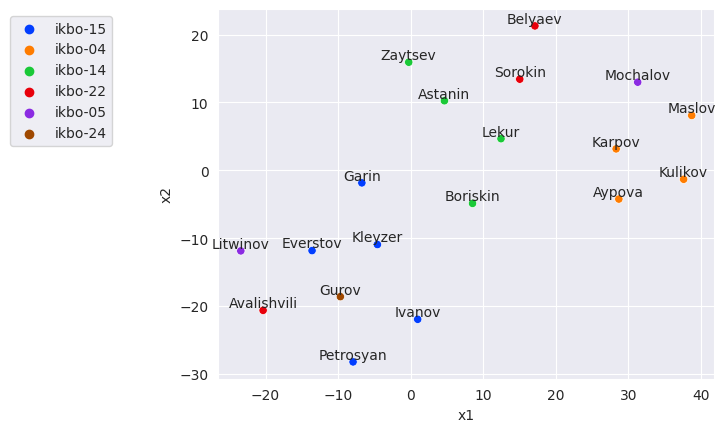

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

model = TSNE(n_components=2, perplexity=10, random_state=42)
TSNE_features = model.fit_transform(df)

DATA = df.copy()
DATA['x1'] = TSNE_features[:,0]
DATA['x2'] = TSNE_features[:,1]
# fig = plt.figure()
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=group_labels ,data=DATA, palette='bright')

for (xi, yi, zi) in zip(DATA['x1'], DATA['x2'], df.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

## Манхэттенское расстояние

In [ ]:
def l1_metric(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.sum(abs(a_emb - b_emb))

In [ ]:
l1_metric('Ivanov', 'Garin', df)

8

## Евклидово расстояние

In [ ]:
def l2_metric(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  return np.sqrt(np.sum(np.power((a_emb - b_emb), 2)))

In [ ]:
l2_metric('Ivanov', 'Garin', df)

2.8284271247461903

## Расстояние Жаккара

In [ ]:
def jaccard(a: str, b: str, df: pd.core.frame.DataFrame):
  a_emb = df[a].to_numpy()
  b_emb = df[b].to_numpy()
  mask = []
  for i in range(len(a_emb)):
    if a_emb[i] == b_emb[i]:
      mask.append(1)
  return sum(mask) / len(a_emb)

In [ ]:
jaccard('Ivanov', 'Kleyzer', df)

0.7333333333333333